# Merge & Fill Missing Values

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. 

In [7]:
import pandas as pd

df_main = pd.read_csv('weather_main_2018.csv')
df_opinion = pd.read_csv('weather_opinion.csv')

df_main.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
display(df_opinion.head())
df_opinion.info()

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  341 non-null    object 
 1   WEATHER_CODE_EVENING  341 non-null    int64  
 2   TOTAL_SNOW_MM         341 non-null    int64  
 3   UV_INDEX              341 non-null    int64  
 4   SUNHOUR               341 non-null    float64
 5   OPINION               341 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ KB


In [10]:
# Your code here :

df2018 = pd.merge(df_main,
                  df_opinion,
                  how="left",
                  left_on='DATE',
                  right_on='date'
                  )

df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,very bad


### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:** 
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [11]:
# You should now probably drop the "date" column. 
# This column is incomplete, it were provided from the opinion file. 
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [12]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.

You're supposed to find 24 different dates.

In [20]:
# Your code here :
null_2018 = df2018[df2018.loc[:,"TOTAL_SNOW_MM"].isna()] # On fait un filtre pour n'afficher que les valeurs manquantes dans la colonne ciblé
null_2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,NaN,NaN,NaN,NaN,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,NaN,NaN,NaN,NaN,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,NaN,NaN,NaN,NaN,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,NaN,NaN,NaN,NaN,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,NaN,NaN,NaN,NaN,NaN


## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [23]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna() # On crée une nouvelle colonne 'flag', dans laquelle on stock toutes les valeurs nul de la colonne 'OPINION'
df2018['flag'].value_counts() # Renvoie une série avec le nombre de chaque valeur unique

flag
False    341
True      24
Name: count, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : TOTAL_SNOW_MM

You have to visualize how are the well-filled data. 

#### Scatterplot directly with Pandas

<Axes: xlabel='DATE', ylabel='TOTAL_SNOW_MM'>

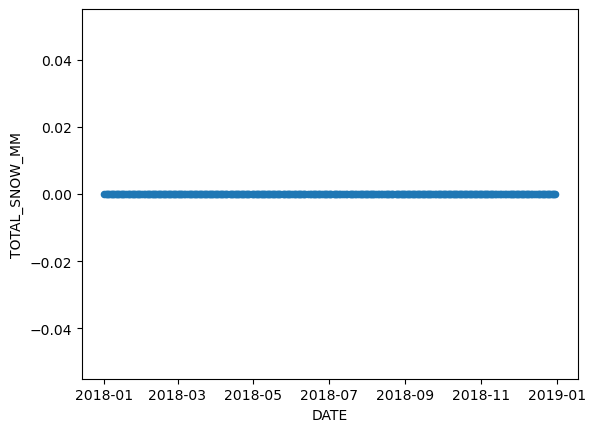

In [24]:
#Code to complete
df2018['DATE'] = pd.to_datetime(df2018['DATE'])
df2018.plot.scatter(x='DATE', y='TOTAL_SNOW_MM')

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

<Axes: >

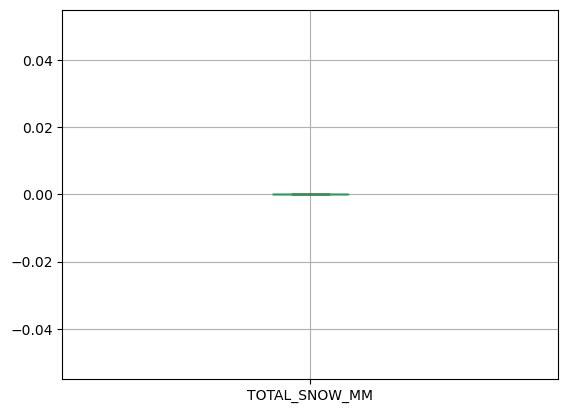

In [27]:
# Find a way to draw directly with pandas a boxplot on the column TOTAL_SNOW_MM

df2018.boxplot(column="TOTAL_SNOW_MM") # .boxplot crée un graph en boîte à partir de la colonne "TOTAL_SNOW_MM"



In [ ]:
# fill values


### 3.2 Second Column: UV_INDEX 

<Axes: xlabel='DATE'>

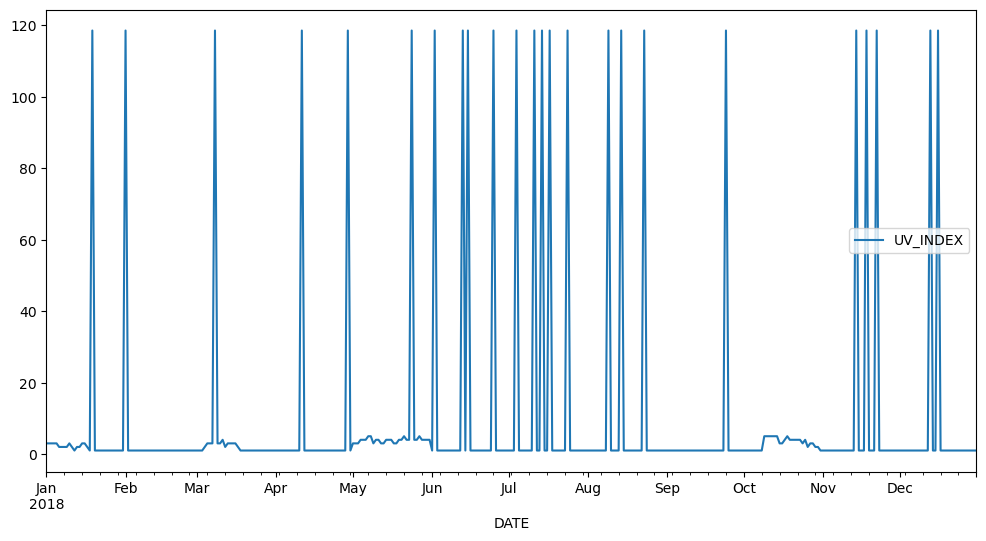

In [82]:
#Code to complete
uv_index_2018 = df2018[df2018.loc[:,"UV_INDEX"].isna()]

df2018.plot(x='DATE' , y="UV_INDEX" , figsize=(12,6))


Y a t-il une meilleure manière de plot ces données ?

<Axes: ylabel='Frequency'>

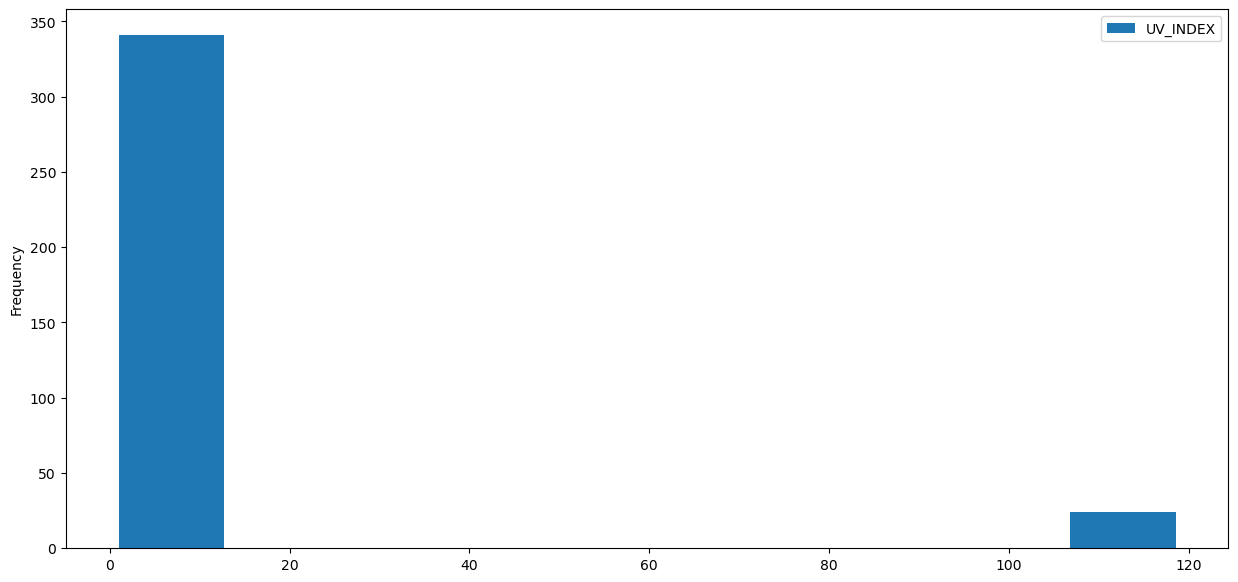

In [84]:
# Your code here
df2018.plot.hist(x='DATE' , y="UV_INDEX" , figsize=(15,7))



In [86]:
# fill values
df2018['UV_INDEX'].fillna(method='ffill', inplace=True)
df2018["UV_INDEX"].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
360    1.0
361    1.0
362    1.0
363    1.0
364    1.0
Name: UV_INDEX, Length: 365, dtype: float64>

### 3.3 - Third column : WEATHER_CODE_EVENING



<Axes: xlabel='DATE', ylabel='WEATHER_CODE_EVENING'>

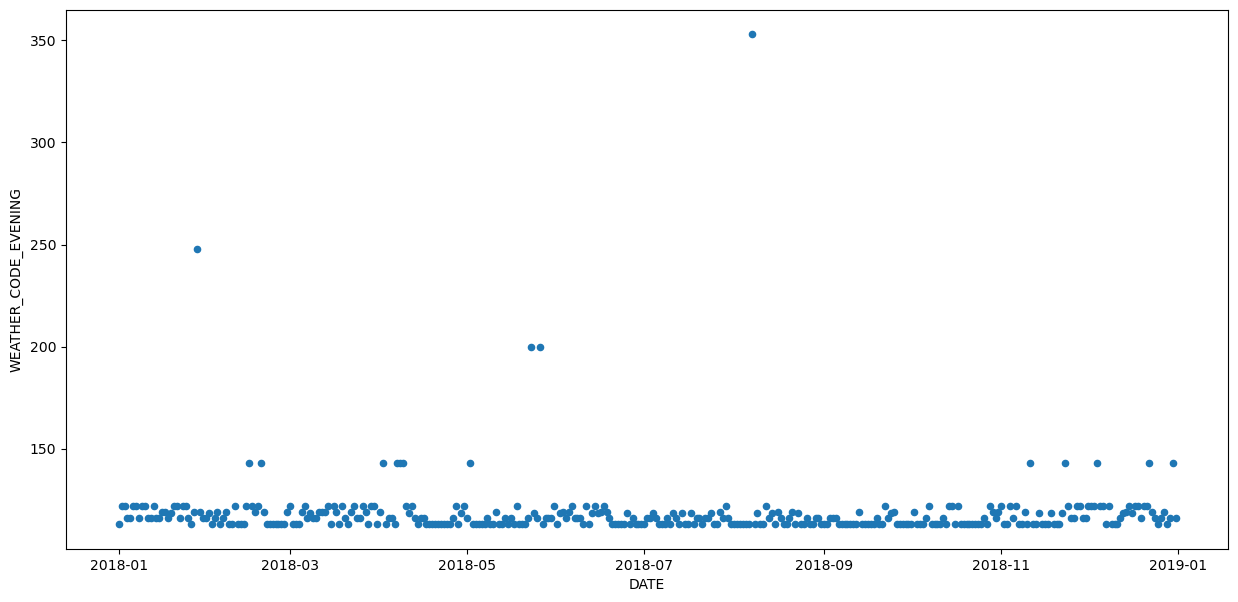

In [88]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis

df2018.plot.scatter(x='DATE', y='WEATHER_CODE_EVENING', figsize=(15,7))


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method 

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [79]:
# df2018['WEATHER_CODE_EVENING'].value_counts()
# df2018['WEATHER_CODE_EVENING'].mean
df2018.fillna(df2018['WEATHER_CODE_EVENING'].mean())


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,False
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,False
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,False
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,False
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad,False
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad,False
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad,False
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad,False


In [ ]:
print(df2018['WEATHER_CODE_EVENING'].mode().values[0])

113.0


In [ ]:
# Hop ! Your code here :

mean_weather_column = df2018['WEATHER_CODE_EVENING'].mode().values[0]    #You have to complete this
print(mean_weather_column)
df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column, inplace = True) # When you are OK, you can replace this argument by True



113.0


In [ ]:
df2018['WEATHER_CODE_EVENING'].value_counts()

113.0    178
116.0     78
122.0     59
119.0     34
143.0     12
200.0      2
248.0      1
353.0      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.4 - Next column : 
SUNHOUR

<Axes: xlabel='DATE', ylabel='SUNHOUR'>

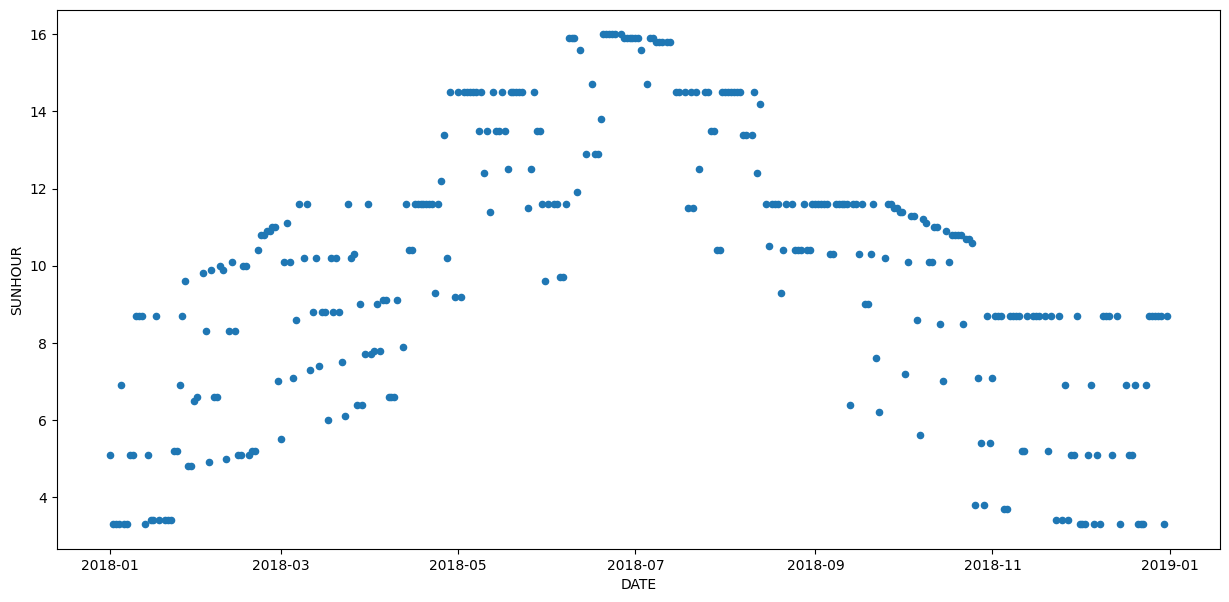

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter(x='DATE', y='SUNHOUR', figsize=(15,7))

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

i= 0

while i <= 1:
  print(df2018['MAX_TEMPERATURE_C'].quantile(i))
  i+=0.1

1.0
8.399999999999999
11.0
12.0
14.0
16.0
20.0
21.799999999999983
24.0
26.0
32.99999999999994


#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

In [ ]:
# your code here:
df2018['SUNHOUR'] = 

# You can use this code to check how many missing values you have :
column_name = 'SUNHOUR'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column SUNHOUR


### 3.5 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [ ]:
# Your code here

column_name = 'OPINION'

df2018[column_name].fillna()

print("\n I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

good                91
very bad            82
bad                 79
not good not bad    68
very good           21
Name: OPINION, dtype: int64
good                91
very bad            82
bad                 79
not good not bad    68
unknown             24
very good           21
Name: OPINION, dtype: int64

 I have  0 missing values in the column OPINION


## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

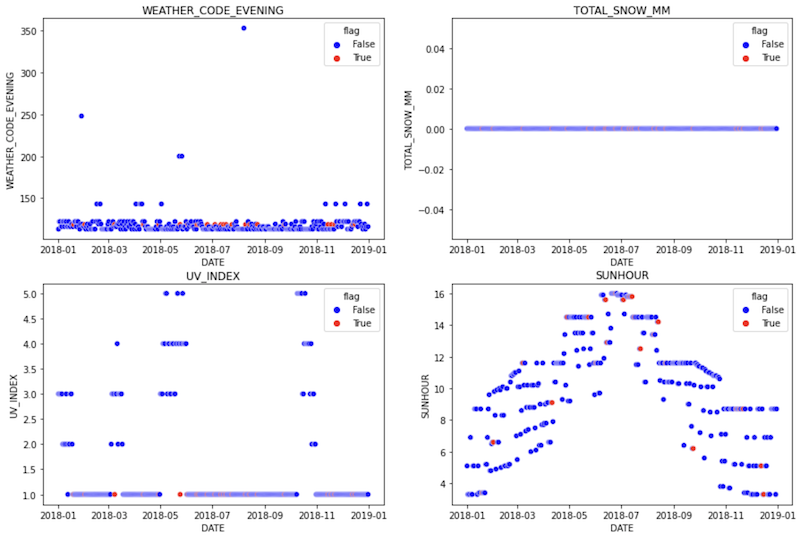

<Axes: xlabel='DATE', ylabel='SUNHOUR'>

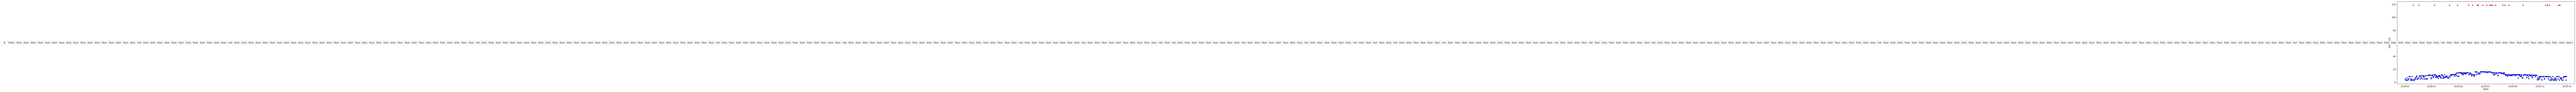

In [89]:
# Your code here

# hint : you could use a list comprehension to have a list of colors for each point

colors = ['red' if flag==True else 'blue' for flag in df2018['flag']]

df2018.plot.scatter(x='DATE', y='SUNHOUR', figsize=(15,7), color=colors)



